In [3]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver import ActionChains
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 시각화 (Exploratory data analysis)
* seaborn 라이브러리를 활용하여 컬럼별 데이터 간의 상관관계 파악
* 데이터의 분포 및 특성 확인

In [15]:
final_df = pd.read_excel("./preprocessed_df.xlsx")
final_df

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,country_name,country_iso_code,continent_name
0,34434803,617875,28817134,0.018,0.837,104032,미국,US,North America
1,30027850,390691,28987311,0.013,0.965,21759,인도,IN,Asia
2,18056639,504897,16388847,0.028,0.908,84949,브라질,BR,South America
3,5760002,110829,5575086,0.019,0.968,88244,프랑스,FR,Europe
4,5381736,49293,5242945,0.009,0.974,63811,터키,TR,Europe
...,...,...,...,...,...,...,...,...,...
219,4,0,4,0.000,1.000,68,마셜 제도,MH,Oceania
220,4,1,3,0.250,0.750,13,바누아투,VU,Oceania
221,3,0,3,0.000,1.000,15,사모아,WS,Oceania
222,2,0,2,0.000,1.000,329,세인트헬레나,SH,Africa


In [16]:
final_df.shape # 데이터 개수 파악

(224, 9)

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
[1257055, 1471990, 3532591, 928121, 70792, 736881]


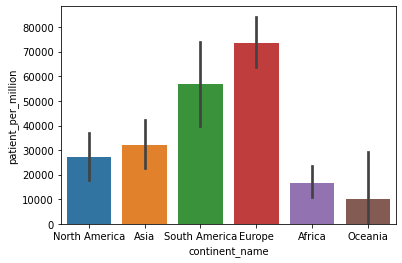

In [17]:
# 대륙별 확진자 수 비교 그래프 (100만명 당 환자수 기준)

continent_group = final_df.groupby('continent_name')['patient_per_million'].sum()
continent_category = continent_group.index.tolist()
continent_data = continent_group.tolist()

print(continent_category)
print(continent_data)

sns.barplot(x="continent_name", y="patient_per_million", data=final_df)
plt.show()

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
[6610460, 59135619, 51372829, 40374776, 24005, 29847453]


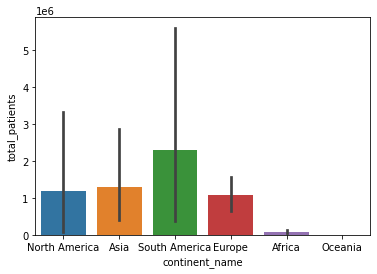

In [18]:
# 대륙별 확진자 수 비교 그래프 (절대 환자 수)

continent_group = final_df.groupby('continent_name')['total_patients'].sum()
continent_category = continent_group.index.tolist()
continent_data = continent_group.tolist()

print(continent_category)
print(continent_data)

sns.barplot(x="continent_name", y="total_patients", data=final_df)
plt.show()

In [19]:
# 인구수 100만명당 환자수 기준으로 상위 10개 국가

final_df.sort_values(by="patient_per_million", ascending=False)[:10]

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,country_name,country_iso_code,continent_name
148,13864,127,13665,0.009,0.986,179434,안도라,AD,Europe
99,100104,1606,98202,0.016,0.981,159385,몬테네그로,ME,Europe
20,1666192,30283,1633482,0.018,0.980,155588,체코,CZ,Europe
70,263689,1326,256063,0.005,0.971,154968,바레인,BH,Asia
175,5090,90,4999,0.018,0.982,150010,산마리노,SM,Europe
145,14620,59,13323,0.004,0.911,148657,세이셸,SC,Africa
111,72294,207,67507,0.003,0.934,133743,몰디브,MV,Asia
178,4323,94,4214,0.022,0.975,128313,지브롤터,GI,Europe
72,257066,4416,251243,0.017,0.977,123653,슬로베니아,SI,Europe
112,70547,818,69461,0.012,0.985,112699,룩셈부르크,LU,Europe


In [20]:
# 절대 환자수 기준으로 상위 10개 국가

final_df.sort_values(by="total_patients", ascending=False)[:10]

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,country_name,country_iso_code,continent_name
0,34434803,617875,28817134,0.018,0.837,104032,미국,US,North America
1,30027850,390691,28987311,0.013,0.965,21759,인도,IN,Asia
2,18056639,504897,16388847,0.028,0.908,84949,브라질,BR,South America
3,5760002,110829,5575086,0.019,0.968,88244,프랑스,FR,Europe
4,5381736,49293,5242945,0.009,0.974,63811,터키,TR,Europe
5,5381736,49293,5242945,0.009,0.974,63811,터키,TR,Asia
6,5350919,130347,4889450,0.024,0.914,36667,러시아,RU,Europe
7,5350919,130347,4889450,0.024,0.914,36667,러시아,RU,Asia
8,4651988,128008,4306482,0.028,0.926,68526,영국,GB,Europe
9,4298782,90281,3928389,0.021,0.914,95115,아르헨티나,AR,South America


In [21]:
# 회복률 높은 순으로 정렬

final_df.sort_values(by="recovery_rate", ascending=False)[:15]

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,country_name,country_iso_code,continent_name
223,1,0,1,0.000,1.000,9,미크로네시아,NaN,Africa
222,2,0,2,0.000,1.000,329,세인트헬레나,SH,Africa
221,3,0,3,0.000,1.000,15,사모아,WS,Oceania
219,4,0,4,0.000,1.000,68,마셜 제도,MH,Oceania
217,20,0,20,0.000,1.000,29,솔로몬 제도,SB,Oceania
214,27,0,27,0.000,1.000,33708,바티칸 시국,VA,Europe
211,63,0,63,0.000,1.000,18103,포클랜드 제도,FK,South America
210,109,0,109,0.000,1.000,7265,앵귈라,AI,North America
208,161,1,160,0.006,0.994,1431,그레나다,GD,North America
114,62448,35,62098,0.001,0.994,10674,싱가포르,SG,Asia


In [22]:
# 사망률 높은 순으로 정렬

final_df.sort_values(by="critical_rate", ascending=False)[:15]

,total_patients,total_death,total_recovered,critical_rate,recovery_rate,patient_per_million,country_name,country_iso_code,continent_name
220,4,1,3,0.250,0.750,13,바누아투,VU,Oceania
168,6892,1355,3980,0.197,0.577,231,예멘,YE,Asia
218,10,1,8,0.100,0.800,17,서사하라,EH,Africa
16,2482784,231505,1977071,0.093,0.796,19256,멕시코,MX,North America
123,36522,2748,30370,0.075,0.832,833,수단,SD,Africa
132,25205,1851,21756,0.073,0.863,1440,시리아,SY,Asia
67,278295,15935,206852,0.057,0.743,2719,이집트,EG,Africa
144,14868,775,7216,0.052,0.485,935,소말리아,SO,Africa
103,91653,4636,86503,0.051,0.944,64,중국,NaN,Africa
216,20,1,19,0.050,0.950,4006,몬트세랫,MS,North America


In [23]:
# 국가별 순위 정보를 시각화하기

country_with_rank = final_df[["country_name", "patient_per_million"]]
country_with_rank = country_with_rank.sort_values(by=["patient_per_million"], ascending=False)[:50]
country_with_rank = country_with_rank.set_index("country_name")

<AxesSubplot:ylabel='country_name'>

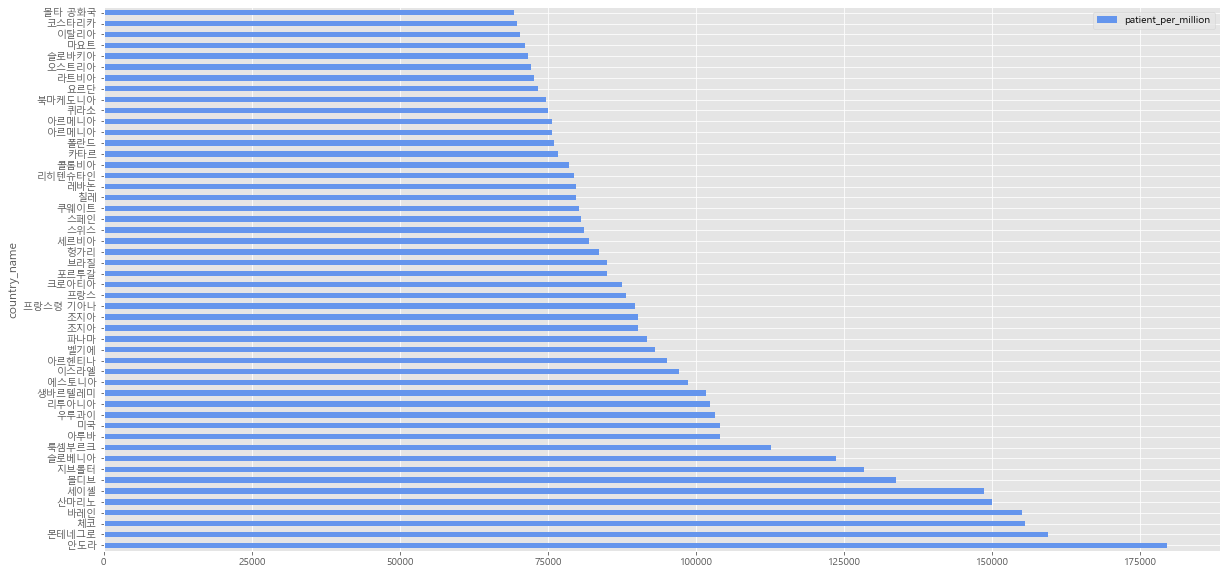

In [24]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
country_with_rank.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(20, 10))